In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
# Load the data into a DataFrame

whites =pd.read_csv('white_wines_clean.csv', sep=';', header=0, encoding_errors='replace', encoding='ansi')

whites.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes
0,Vie di Romans,Dolée,4.2,31,36.00,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Friulano,2008.0,64.4267,26.4338,51.6989,albero da frutta/agrume/legno
1,Serafini & Vidotto,Phigaia El Blanco,3.8,28,15.90,na / na / na,Italia,delle Venezie,Miscela,2018.0,NaN,NaN,NaN,NaN
2,Vie di Romans,Ciampagnis Chardonnay,4.1,38,21.15,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2020.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume
3,Fattoria Sardi,Vermentino,3.9,46,12.00,Pasta / Vegetariano / Antipasti e spuntini,Italia,Colline Lucchesi,Vermentino,2019.0,39.3159,24.7480,66.3812,albero da frutta/agrume/Erbaceo
4,Panizzi,Vernaccia di San Gimignano Blanco,3.8,400,9.90,Pasta / Vegetariano / Antipasti e spuntini,Italia,Vernaccia di San Gimignano,Vernaccia di San Gimignano,2018.0,43.9714,18.4180,66.2523,albero da frutta/agrume/Erbaceo


In [3]:
# Check for dtypes

whites['year'] = whites['year'].astype('str')
whites.dtypes

company         object
name            object
avg_review     float64
num_review       int64
price          float64
food_advice     object
country         object
region          object
wine_type       object
year            object
legg_strutt    float64
secco_dolce    float64
piatto_acid    float64
notes           object
dtype: object

In [4]:
whites['idname'] = whites.name + ' - ' + whites.year + ' - ' + whites.company

df = whites.set_index('idname')

df.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes
idname,,,,,,,,,,,,,,
Dolée - 2008.0 - Vie di Romans,Vie di Romans,Dolée,4.2,31,36.00,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Friulano,2008.0,64.4267,26.4338,51.6989,albero da frutta/agrume/legno
Phigaia El Blanco - 2018.0 - Serafini & Vidotto,Serafini & Vidotto,Phigaia El Blanco,3.8,28,15.90,na / na / na,Italia,delle Venezie,Miscela,2018.0,NaN,NaN,NaN,NaN
Ciampagnis Chardonnay - 2020.0 - Vie di Romans,Vie di Romans,Ciampagnis Chardonnay,4.1,38,21.15,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2020.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume
Vermentino - 2019.0 - Fattoria Sardi,Fattoria Sardi,Vermentino,3.9,46,12.00,Pasta / Vegetariano / Antipasti e spuntini,Italia,Colline Lucchesi,Vermentino,2019.0,39.3159,24.7480,66.3812,albero da frutta/agrume/Erbaceo
Vernaccia di San Gimignano Blanco - 2018.0 - Panizzi,Panizzi,Vernaccia di San Gimignano Blanco,3.8,400,9.90,Pasta / Vegetariano / Antipasti e spuntini,Italia,Vernaccia di San Gimignano,Vernaccia di San Gimignano,2018.0,43.9714,18.4180,66.2523,albero da frutta/agrume/Erbaceo


In [5]:
# Create a copy of the DataFrame for clustering

df_cl = df.copy()

df_cl = df_cl.dropna()


df_cl.drop(columns=['name', 'company', 'avg_review', 'num_review', 'food_advice', 'country', 'region', 'year'], inplace=True)

In [6]:
# Create a copy of the DataFrame for later use

df_cl_original = df_cl.copy()

In [7]:
# Extract unique notes from the 'notes' column

notes = set()

for row in df_cl.notes:
    for note in row.split('/'):
        notes.add(note)
        
# One-hot encode the notes

for note in notes:
    col = []
    for row in df_cl.notes.to_list():
        if note in row:
            col.append(1)
        else:
            col.append(0)
    df_cl['Note: '+ note] = col

In [8]:
# Drop the original 'notes' column

df_cl.drop(columns=['notes'], inplace=True)

,price,wine_type,legg_strutt,secco_dolce,piatto_acid,Note: bacche nere,Note: vegetale,Note: frutti rossi,Note: agrume,Note: Invecchiamento,Note: lieviti,Note: Floreale,Note: spezie,Note: Erbaceo,Note: nota tropicale,Note: frutta secca,Note: legno,Note: albero da frutta
idname,,,,,,,,,,,,,,,,,,
Dolée - 2008.0 - Vie di Romans,36.00,Friulano,64.4267,26.4338,51.6989,0,0,0,1,0,0,0,0,0,0,0,1,1
Ciampagnis Chardonnay - 2020.0 - Vie di Romans,21.15,Chardonnay,62.6386,25.1236,51.0969,0,0,0,1,0,0,0,0,0,0,0,1,1
Vermentino - 2019.0 - Fattoria Sardi,12.00,Vermentino,39.3159,24.7480,66.3812,0,0,0,1,0,0,0,0,1,0,0,0,1
Vernaccia di San Gimignano Blanco - 2018.0 - Panizzi,9.90,Vernaccia di San Gimignano,43.9714,18.4180,66.2523,0,0,0,1,0,0,0,0,1,0,0,0,1
Pandataria - 2018.0 - Candidaterra,27.90,Falanghina,50.3706,22.4478,42.7289,0,0,0,0,0,0,0,0,1,1,0,0,0


In [9]:
# Scale the 'legg_strutt', 'secco_dolce', and 'piatto_acid' columns

df_cl['legg_strutt'] = df_cl['legg_strutt'].div(100).round(3)
df_cl['secco_dolce'] = df_cl['secco_dolce'].div(100).round(3)
df_cl['piatto_acid'] = df_cl['piatto_acid'].div(100).round(3)

In [18]:
#Get list of categorical variables
s = (df_cl.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['wine_type']


In [8]:
# Label Encoding the object dtypes
L_E=LabelEncoder()
for i in object_cols:
    df_cl[i]=df_cl[[i]].apply(L_E.fit_transform)

NameError: name 'object_cols' is not defined

In [10]:
# One Hot Encoding of categorical variables
df_cl = pd.get_dummies(df_cl)
df_cl.head()

,price,legg_strutt,secco_dolce,piatto_acid,Note: bacche nere,Note: vegetale,Note: frutti rossi,Note: agrume,Note: Invecchiamento,Note: lieviti,...,wine_type_Vermentino,wine_type_Vernaccia,wine_type_Vernaccia di Oristano,wine_type_Vernaccia di San Gimignano,wine_type_Vespaiola,wine_type_Viognier,wine_type_Vitovska,wine_type_Weissburgunder,wine_type_Yellow Muscat,wine_type_Zibibbo
idname,,,,,,,,,,,,,,,,,,,,,
Dolée - 2008.0 - Vie di Romans,36.00,0.644,0.264,0.517,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Ciampagnis Chardonnay - 2020.0 - Vie di Romans,21.15,0.626,0.251,0.511,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Vermentino - 2019.0 - Fattoria Sardi,12.00,0.393,0.247,0.664,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Vernaccia di San Gimignano Blanco - 2018.0 - Panizzi,9.90,0.440,0.184,0.663,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Pandataria - 2018.0 - Candidaterra,27.90,0.504,0.224,0.427,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Scale the DataFrame using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_cl)
scaled_df_cl = pd.DataFrame(scaler.transform(df_cl),columns= df_cl.columns )
scaled_df_cl

,price,legg_strutt,secco_dolce,piatto_acid,Note: bacche nere,Note: vegetale,Note: frutti rossi,Note: agrume,Note: Invecchiamento,Note: lieviti,...,wine_type_Vermentino,wine_type_Vernaccia,wine_type_Vernaccia di Oristano,wine_type_Vernaccia di San Gimignano,wine_type_Vespaiola,wine_type_Viognier,wine_type_Vitovska,wine_type_Weissburgunder,wine_type_Yellow Muscat,wine_type_Zibibbo
0,0.063489,0.821555,0.442211,0.637485,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.032166,0.789753,0.420436,0.630086,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.012866,0.378092,0.413735,0.818742,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.008437,0.461131,0.308208,0.817509,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.046404,0.574205,0.375209,0.526510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,0.046615,0.791519,0.314908,0.510481,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1934,0.029530,0.777385,0.338358,0.701603,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1935,0.010546,0.570671,0.412060,0.806412,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1936,0.002067,0.791519,0.189280,0.400740,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Elbow Method to determine the number of clusters to be formed:


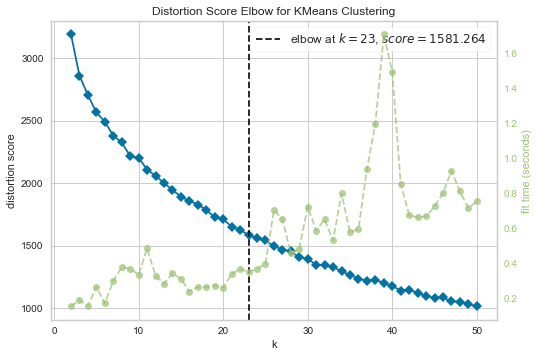

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Use the elbow method to determine the optimal number of clusters

print('Elbow Method to determine the number of clusters to be formed:')
Elbow = KElbowVisualizer(KMeans(), k=50)
Elbow.fit(scaled_df_cl) #scaled_df_cl
Elbow.show()

Silhouette Coefficient to determine the number of clusters to be formed:


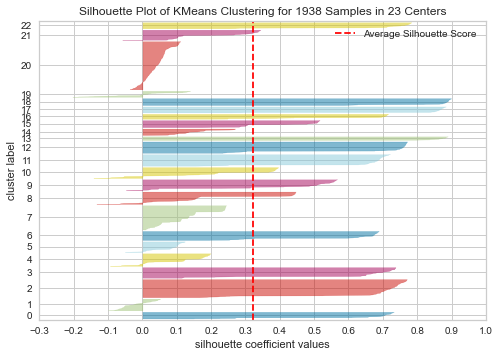

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1938 Samples in 23 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# Use the silhouette coefficient to determine the optimal number of clusters

print('Silhouette Coefficient to determine the number of clusters to be formed:')
visualizer = SilhouetteVisualizer(KMeans(n_clusters=23), colors='yellowbrick')
visualizer.fit(scaled_df_cl)
visualizer.show()

Intercluster Distance to visualize distance between clusters:


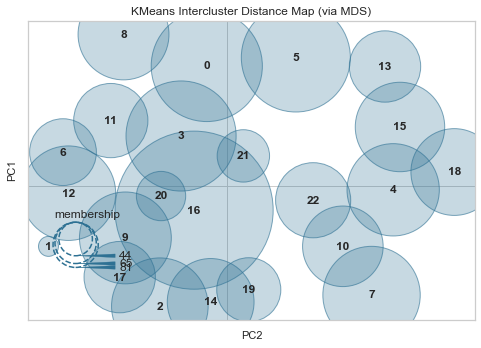

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [23]:
# Visualize the distance between clusters

print('Intercluster Distance to visualize distance between clusters:')
inter_dis = InterclusterDistance(KMeans(n_clusters=23))
inter_dis.fit(scaled_df_cl)
inter_dis.show()

In [24]:
# Perform k-means clustering for various values of k and calculate the silhouette score for each

for i in range(10, 24, 1):
    kmeans = KMeans(n_clusters=i, n_init=100, max_iter=500)
    clusters = kmeans.fit_predict(scaled_df_cl)
    print('Cluster k: ', i)
    print('Silhouette %s' % silhouette_score(scaled_df_cl, kmeans.labels_))

Cluster k:  10
Silhouette 0.20132943512696672
Cluster k:  11
Silhouette 0.21759045470158486
Cluster k:  12
Silhouette 0.22459865619912198
Cluster k:  13
Silhouette 0.23002853332878143
Cluster k:  14
Silhouette 0.2415641981497846
Cluster k:  15
Silhouette 0.24535589507694658
Cluster k:  16
Silhouette 0.26393419083448466
Cluster k:  17
Silhouette 0.2556896053975364
Cluster k:  18
Silhouette 0.2731975795452127
Cluster k:  19
Silhouette 0.2898205546104303
Cluster k:  20
Silhouette 0.3000008240665643
Cluster k:  21
Silhouette 0.31549796865141555
Cluster k:  22
Silhouette 0.32979383529859746
Cluster k:  23
Silhouette 0.3316692209218579


In [12]:
# Perform k-means clustering with the optimal number of clusters

kmeans = KMeans(n_clusters=23, n_init=100, max_iter=500)
clusters = kmeans.fit_predict(scaled_df_cl)
df_cl_original["Clusters"]= clusters

In [13]:
# Print the silhouette score of the final clustering

print('Silhouette %s' % silhouette_score(scaled_df_cl, kmeans.labels_))

Silhouette 0.3383414487284439


In [27]:
# Print the size of each cluster

hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(scaled_df_cl)))

Cluster 0: 80 (0.04)
Cluster 1: 83 (0.04)
Cluster 2: 124 (0.06)
Cluster 3: 104 (0.05)
Cluster 4: 100 (0.05)
Cluster 5: 128 (0.07)
Cluster 6: 112 (0.06)
Cluster 7: 48 (0.02)
Cluster 8: 66 (0.03)
Cluster 9: 45 (0.02)
Cluster 10: 52 (0.03)
Cluster 11: 42 (0.02)
Cluster 12: 39 (0.02)
Cluster 13: 79 (0.04)
Cluster 14: 56 (0.03)
Cluster 15: 200 (0.10)
Cluster 16: 33 (0.02)
Cluster 17: 80 (0.04)
Cluster 18: 50 (0.03)
Cluster 19: 47 (0.02)
Cluster 20: 40 (0.02)
Cluster 21: 45 (0.02)
Cluster 22: 285 (0.15)


In [13]:
df_cl_original.head()

,price,wine_type,legg_strutt,secco_dolce,piatto_acid,notes,Clusters
idname,,,,,,,
Dolée - 2008.0 - Vie di Romans,36.00,Friulano,64.4267,26.4338,51.6989,albero da frutta/agrume/legno,4
Ciampagnis Chardonnay - 2020.0 - Vie di Romans,21.15,Chardonnay,62.6386,25.1236,51.0969,legno/albero da frutta/agrume,4
Vermentino - 2019.0 - Fattoria Sardi,12.00,Vermentino,39.3159,24.7480,66.3812,albero da frutta/agrume/Erbaceo,2
Vernaccia di San Gimignano Blanco - 2018.0 - Panizzi,9.90,Vernaccia di San Gimignano,43.9714,18.4180,66.2523,albero da frutta/agrume/Erbaceo,12
Pandataria - 2018.0 - Candidaterra,27.90,Falanghina,50.3706,22.4478,42.7289,Erbaceo/nota tropicale,5


In [14]:
# Save the DataFrame with cluster assignments to a CSV file

df_cl_original.to_csv('df_clustering_whites.csv', sep=',', encoding='ansi')